# Importing Libraries

In [1]:
# data analysis libraries
import pandas as pd
import numpy as np
from numpy.random import RandomState
        
# visualisation libraries
from matplotlib import pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

#Wordcloud
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#others
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display_html 
from IPython.core.display import HTML
from collections import defaultdict
import datetime
import re

# Loading the data

In [2]:
#Loading the data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_links = pd.read_csv('links.csv')
df_movies = pd.read_csv('movies.csv')
df_imdb = pd.read_csv('imdb_data.csv')
df_tags = pd.read_csv('tags.csv')
df_genome_tags = pd.read_csv('genome_tags.csv')
df_genome_scores = pd.read_csv('genome_scores.csv')
df_sample_submission = pd.read_csv('sample_submission.csv')

# EDA(Exploratory Data Analysis)

 <a id="section-three"></a>

## Data Description
Here is the data that we are was given to us.
Supplied Files
* genome_scores.csv - a score mapping the strength between movies and tag-related properties. Read more here
* genome_tags.csv - user assigned tags for genome-related scores
* imdb_data.csv - Additional movie metadata scraped from IMDB using the links.csv file.
* links.csv - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
* sample_submission.csv - Sample of the submission format for the hackathon.
* tags.csv - User assigned for the movies within the dataset.
* test.csv - The test split of the dataset. Contains user and movie IDs with no rating data.
* train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data.

*Description of the data that is given to us *

## Viewing Our Data

In [3]:
#Function to display all data
def data_overview_display(dataframe_list,column_names=[]):
    """
    Displays multiple dataframes in one cell.

    Parameter(s):
    -------------
    dataframe_list(DataFrame(s)): an input of dataframe(s) as list.
    column_names(string): list of string.
    
    Return
    ------
    display_html(DataFrame(s)): returns multiple of dataframes in one cell.
    
    """
    html_string = ''
    html_string += ('<tr>' + ''.join(f'<td style="text-align:center">{name}</td>' for name in column_names) + '</tr>')
    html_string += ('<tr>' + ''.join(f'<td style="vertical-align:top"> {df.to_html(index=True)}</td>' for df in dataframe_list) + '</tr>')
    html_string = f'<table>{html_string}</table>'
    html_string = html_string.replace('table','table style="display:inline"')
    display_html(html_string, raw=True)

In [4]:
#Generate the overview
data_overview_display([df_movies.head(),df_genome_tags.head(),df_genome_scores.head()], column_names=['Movies dataframe','genome tags df','genome scores df'])
data_overview_display([df_train.head(),df_test.head(),df_links.head(),df_tags.head()], column_names=['Train df','Test df','Links df','Tags df'])
data_overview_display([df_imdb.head()], column_names=['Imdb df'])

Movies dataframe genome tags df genome scores df 
 
 
 
 movieId 
 title 
 genres 
 
 
 
 
 0 
 1 
 Toy Story (1995) 
 Adventure|Animation|Children|Comedy|Fantasy 
 
 
 1 
 2 
 Jumanji (1995) 
 Adventure|Children|Fantasy 
 
 
 2 
 3 
 Grumpier Old Men (1995) 
 Comedy|Romance 
 
 
 3 
 4 
 Waiting to Exhale (1995) 
 Comedy|Drama|Romance 
 
 
 4 
 5 
 Father of the Bride Part II (1995) 
 Comedy 
 
 
 
 
 
 
 tagId 
 tag 
 
 
 
 
 0 
 1 
 007 
 
 
 1 
 2 
 007 (series) 
 
 
 2 
 3 
 18th century 
 
 
 3 
 4 
 1920s 
 
 
 4 
 5 
 1930s 
 
 
 
 
 
 
 movieId 
 tagId 
 relevance 
 
 
 
 
 0 
 1 
 1 
 0.02875 
 
 
 1 
 1 
 2 
 0.02375 
 
 
 2 
 1 
 3 
 0.06250 
 
 
 3 
 1 
 4 
 0.07575 
 
 
 4 
 1 
 5 
 0.14075

Train df Test df Links df Tags df 
 
 
 
 userId 
 movieId 
 rating 
 timestamp 
 
 
 
 
 0 
 5163 
 57669 
 4.0 
 1518349992 
 
 
 1 
 106343 
 5 
 4.5 
 1206238739 
 
 
 2 
 146790 
 5459 
 5.0 
 1076215539 
 
 
 3 
 106362 
 32296 
 2.0 
 1423042565 
 
 
 4 
 9041 
 366 
 3.0 
 833375837 
 
 
 
 
 
 
 userId 
 movieId 
 
 
 
 
 0 
 1 
 2011 
 
 
 1 
 1 
 4144 
 
 
 2 
 1 
 5767 
 
 
 3 
 1 
 6711 
 
 
 4 
 1 
 7318 
 
 
 
 
 
 
 movieId 
 imdbId 
 tmdbId 
 
 
 
 
 0 
 1 
 114709 
 862.0 
 
 
 1 
 2 
 113497 
 8844.0 
 
 
 2 
 3 
 113228 
 15602.0 
 
 
 3 
 4 
 114885 
 31357.0 
 
 
 4 
 5 
 113041 
 11862.0 
 
 
 
 
 
 
 userId 
 movieId 
 tag 
 timestamp 
 
 
 
 
 0 
 3 
 260 
 classic 
 1439472355 
 
 
 1 
 3 
 260 
 sci-fi 
 1439472256 
 
 
 2 
 4 
 1732 
 dark comedy 
 1573943598 
 
 
 3 
 4 
 1732 
 great dialogue 
 1573943604 
 
 
 4 
 4 
 7569 
 so bad it's good 
 1573943455

Imdb df 
 
 
 
 movieId 
 title_cast 
 director 
 runtime 
 budget 
 plot_keywords 
 
 
 
 
 0 
 1 
 Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morris|Erik von Detten|Laurie Metcalf|R. Lee Ermey|Sarah Freeman|Penn Jillette|Jack Angel|Spencer Aste 
 John Lasseter 
 81.0 
 $30,000,000 
 toy|rivalry|cowboy|cgi animation 
 
 
 1 
 2 
 Robin Williams|Jonathan Hyde|Kirsten Dunst|Bradley Pierce|Bonnie Hunt|Bebe Neuwirth|David Alan Grier|Patricia Clarkson|Adam Hann-Byrd|Laura Bell Bundy|James Handy|Gillian Barber|Brandon Obray|Cyrus Thiedeke|Gary Joseph Thorup 
 Jonathan Hensleigh 
 104.0 
 $65,000,000 
 board game|adventurer|fight|game 
 
 
 2 
 3 
 Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Margret|Burgess Meredith|Daryl Hannah|Kevin Pollak|Katie Sagona|Ann Morgan Guilbert|James Andelin|Marcus Klemp|Max Wright|Cheryl Hawker|Wayne A. Evenson|Allison Levine 
 Mark Steven Johnson 
 101.0 
 $25,000,000 
 boat|lake|neighbor|rivalry 
 
 
 3 
 4 
 Whitney Houston|Angela Bassett|Loretta Devine|Lela Rochon|Gregory Hines|Dennis Haysbert|Mykelti Williamson|Michael Beach|Leon|Wendell Pierce|Donald Faison|Jeffrey D. Sams|Jazz Raycole|Brandon Hammond|Kenya Moore 
 Terry McMillan 
 124.0 
 $16,000,000 
 black american|husband wife relationship|betrayal|mother son relationship 
 
 
 4 
 5 
 Steve Martin|Diane Keaton|Martin Short|Kimberly Williams-Paisley|George Newbern|Kieran Culkin|BD Wong|Peter Michael Goetz|Kate McGregor-Stewart|Jane Adams|Eugene Levy|Rebecca Chambers|April Ortiz|Dulcy Rogers|Kathy Anthony 
 Albert Hackett 
 106.0 
 $30,000,000 
 fatherhood|doberman|dog|mansion

## Checking for duplicates

In [5]:
#Create the duplicates values dataframes of all the given data
train_duplicates = pd.DataFrame({"Duplicate Values":df_train.duplicated(['userId', 'movieId', 'rating', 'timestamp']).sum()}, index=[0])
train_duplicates = pd.DataFrame({"Duplicate Values":df_test.duplicated(['userId', 'movieId']).sum()}, index=[0])
movies_duplicates = pd.DataFrame({"Duplicate Values":df_movies.duplicated(['movieId', 'title', 'genres']).sum()}, index=[0])
links_duplicates = pd.DataFrame({"Duplicate Values":df_links.duplicated(['movieId', 'imdbId', 'tmdbId']).sum()}, index=[0])
imdb_duplicates = pd.DataFrame({"Duplicate Values":df_imdb.duplicated(['movieId', 'title_cast', 'director', 'runtime', 'budget', 'plot_keywords']).sum()}, index=[0])
tags_duplicates = pd.DataFrame({"Duplicate Values":df_tags.duplicated(['userId', 'movieId', 'tag', 'timestamp']).sum()}, index=[0])
genome_tags_duplicates = pd.DataFrame({"Duplicate Values":df_genome_tags.duplicated(['tagId', 'tag']).sum()}, index=[0])
genome_scores_duplicates = pd.DataFrame({"Duplicate Values":df_genome_scores.duplicated(['movieId', 'tagId', 'relevance']).sum()}, index=[0])

In [6]:
data_overview_display([train_duplicates, train_duplicates, movies_duplicates, links_duplicates, imdb_duplicates, tags_duplicates, genome_tags_duplicates, genome_scores_duplicates], column_names=['Train df','Test df','Movies df', 'link df', 'genome scores df', 'tags df', 'genome tags df', 'imdb df'])

Train df Test df Movies df link df genome scores df tags df genome tags df imdb df 
 
 
 
 Duplicate Values 
 
 
 
 
 0 
 0 
 
 
 
 
 
 
 Duplicate Values 
 
 
 
 
 0 
 0 
 
 
 
 
 
 
 Duplicate Values 
 
 
 
 
 0 
 0 
 
 
 
 
 
 
 Duplicate Values 
 
 
 
 
 0 
 0 
 
 
 
 
 
 
 Duplicate Values 
 
 
 
 
 0 
 0 
 
 
 
 
 
 
 Duplicate Values 
 
 
 
 
 0 
 0 
 
 
 
 
 
 
 Duplicate Values 
 
 
 
 
 0 
 0 
 
 
 
 
 
 
 Duplicate Values 
 
 
 
 
 0 
 0

## Checking for null values

In [7]:
#Create the null values dataframes of all the given data
train_null = pd.DataFrame({"Null Values":df_train.isnull().sum()})
test_null = pd.DataFrame({"Null Values":df_test.isnull().sum()})
movies_null = pd.DataFrame({"Null Values":df_movies.isnull().sum()})
links_null = pd.DataFrame({"Null Values":df_links.isnull().sum()})
imdb_null = pd.DataFrame({"Null Values":df_imdb.isnull().sum()})
tags_null = pd.DataFrame({"Null Values":df_tags.isnull().sum()})
genome_tags_null = pd.DataFrame({"Null Values":df_genome_tags.isnull().sum()})
genome_scores_null = pd.DataFrame({"Null Values":df_genome_scores.isnull().sum()})

In [8]:
data_overview_display([train_null,test_null,movies_null,links_null,genome_scores_null,tags_null,genome_tags_null, imdb_null], column_names=['Train df','Test df','Movies df', 'link df', 'genome scores df', 'tags df', 'genome tags df', 'imdb df'])

Train df Test df Movies df link df genome scores df tags df genome tags df imdb df 
 
 
 
 Null Values 
 
 
 
 
 userId 
 0 
 
 
 movieId 
 0 
 
 
 rating 
 0 
 
 
 timestamp 
 0 
 
 
 
 
 
 
 Null Values 
 
 
 
 
 userId 
 0 
 
 
 movieId 
 0 
 
 
 
 
 
 
 Null Values 
 
 
 
 
 movieId 
 0 
 
 
 title 
 0 
 
 
 genres 
 0 
 
 
 
 
 
 
 Null Values 
 
 
 
 
 movieId 
 0 
 
 
 imdbId 
 0 
 
 
 tmdbId 
 107 
 
 
 
 
 
 
 Null Values 
 
 
 
 
 movieId 
 0 
 
 
 tagId 
 0 
 
 
 relevance 
 0 
 
 
 
 
 
 
 Null Values 
 
 
 
 
 userId 
 0 
 
 
 movieId 
 0 
 
 
 tag 
 16 
 
 
 timestamp 
 0 
 
 
 
 
 
 
 Null Values 
 
 
 
 
 tagId 
 0 
 
 
 tag 
 0 
 
 
 
 
 
 
 Null Values 
 
 
 
 
 movieId 
 0 
 
 
 title_cast 
 10068 
 
 
 director 
 9874 
 
 
 runtime 
 12089 
 
 
 budget 
 19372 
 
 
 plot_keywords 
 11078

In [9]:
#Make a copy of the train data
train = df_train.copy()
train.head()


,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


## Normalising and Combining the Data

In [10]:
#extracting released year
df_movies['release_year']=df_movies['title'].str[-5:-1] 
#spliting the genres into a list
df_movies['genres']=df_movies['genres'].str.split('|') 
#concatinate ratings with movies dataframe
df_movies=pd.concat([df_movies,df_train['rating']],axis=1).dropna() 
df_movies.head()

,movieId,title,genres,release_year,rating
0,1.0,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,4.0
1,2.0,Jumanji (1995),"[Adventure, Children, Fantasy]",1995,4.5
2,3.0,Grumpier Old Men (1995),"[Comedy, Romance]",1995,5.0
3,4.0,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",1995,2.0
4,5.0,Father of the Bride Part II (1995),[Comedy],1995,3.0


In [11]:
#spliting the title cast into a list
df_imdb['title_cast']=df_imdb['title_cast'].str.split('|') 
#spliting the Key words into a list
df_imdb['plot_keywords']=df_imdb['plot_keywords'].str.split('|') 
df_imdb.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,81.0,"$30,000,000","[toy, rivalry, cowboy, cgi animation]"
1,2,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Jonathan Hensleigh,104.0,"$65,000,000","[board game, adventurer, fight, game]"
2,3,"[Walter Matthau, Jack Lemmon, Sophia Loren, An...",Mark Steven Johnson,101.0,"$25,000,000","[boat, lake, neighbor, rivalry]"
3,4,"[Whitney Houston, Angela Bassett, Loretta Devi...",Terry McMillan,124.0,"$16,000,000","[black american, husband wife relationship, be..."
4,5,"[Steve Martin, Diane Keaton, Martin Short, Kim...",Albert Hackett,106.0,"$30,000,000","[fatherhood, doberman, dog, mansion]"


## Latest Popular Movies by ratings (Top 20) from 2000 to date

In [12]:
#Below is the function that extract porpular movies

def extract_popular_movies(df1,df2):
    """
    Retruns porpular movies from based on avarage ratings and total ratings count.

    Parameters
    ----------
    df1: DataFrame from train_df.
    df2: DataFrame from movies_df.
    
    Return
    ------
    Porpular_movies(DataFrame): returns dataframe of porpular movies.
    
    Example
    -------
    >>> train = pd.read_csv('train.csv')
    >>> movie = pd.read_csv('train.csv')
    
    >>> extract_popular_movies(train, movie).head(2)
    
    -----------------------------------------------
           title| rating|rating_counts|release_year
    -----------------------------------------------
    0 |abc(2001)| 3.2341|        2435 |       2001
    1 |def(2002)| 5.2343|        534  |       2002    
      
    """
    #Calculating the avarage rating and storing the results as a DataFrame
    rating = pd.DataFrame(df1.groupby('movieId')['rating'].mean())
    #Calculating the total ratings count and storing the results as a DataFrame
    rating['ratings_count'] = pd.DataFrame(df1.groupby('movieId')['rating'].count())
    rating=rating.sort_values(by=['ratings_count','ratings_count'],ascending=False).reset_index()
    
    #Joining the Two DataFrames
    inner_join = pd.merge(rating,df2,on ='movieId',how ='inner')
    popular_movies=inner_join[['title','rating_x','ratings_count','release_year']].rename(columns={"rating_x": "rating"})
    
    return popular_movies

In [13]:
#Create the variable "data"
data=extract_popular_movies(train,df_movies)

#Extracting latest movies from 2000 till to date
latest_movies=data[data['release_year']>'2000'][['rating','ratings_count','title']]

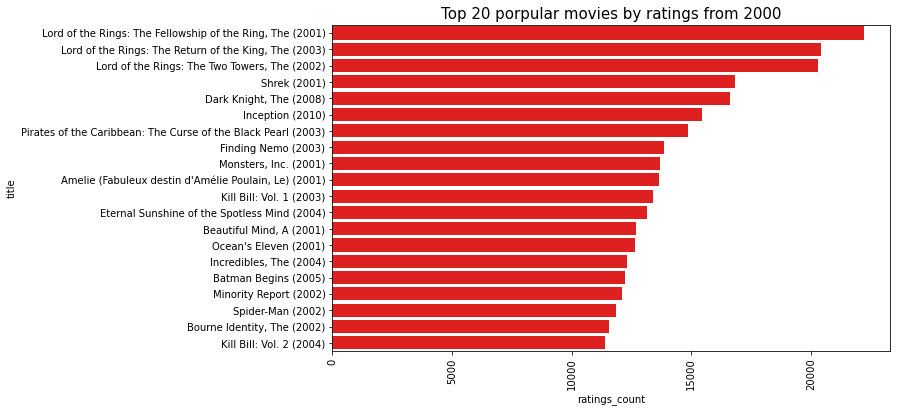

In [14]:
#Plotting the latest movies from 2000 using bar-plots
plt.figure(figsize = (10,6))
ax=sns.barplot(y='title', x='ratings_count', data=latest_movies.head(20),color='red')
ax.set_title('Top 20 porpular movies by ratings from 2000',fontsize=15)
plt.xticks(rotation=90)
plt.show()

* From the above plot, we observe that the based on average rating and the total count of ratings, the movie Lord of the Rings: The Fellowship of the Ring (2001) had the most rating counts of over 21 000 when we considered movies from 2000 till date.

## Popular Cast

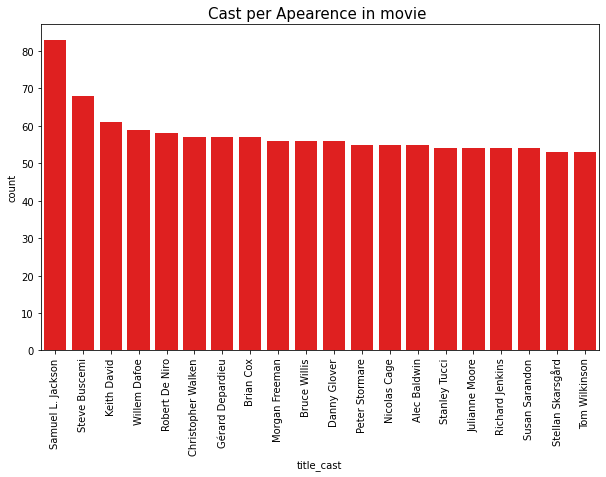

In [15]:
#Plotting popular cast using count-plot
plt.figure(figsize = (10,6))
title_cast=df_imdb['title_cast'].explode()
ax=sns.countplot(x= title_cast, order = title_cast.value_counts().index[:20],color='red')
ax.set_title('Cast per Apearence in movie ',fontsize=15)
plt.xticks(rotation=90)
plt.show()

* Observation: Samuel L Jackson was the popular cast as he appeared in over 80 movies from our database.

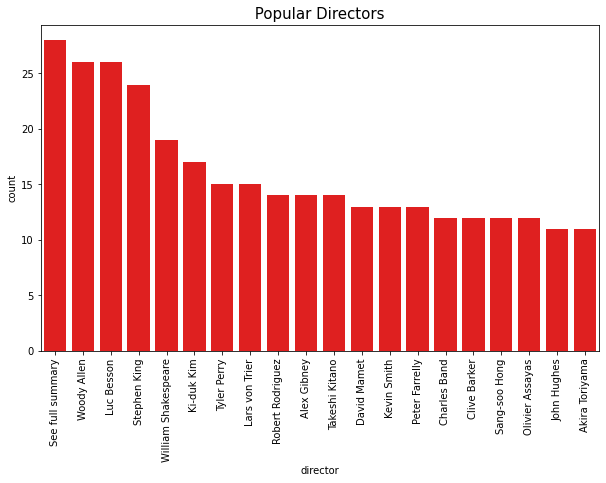

In [16]:
#Plotting popular cast using count-plot
plt.figure(figsize = (10,6))
director=df_imdb['director'].explode()
ax=sns.countplot(x= director, order = director.value_counts().index[:20],color='red')
ax.set_title(' Popular Directors ',fontsize=15)
plt.xticks(rotation=90)
plt.show()

* Observation: Luc Besson was the popular director as he directed over 25 movies from our database.

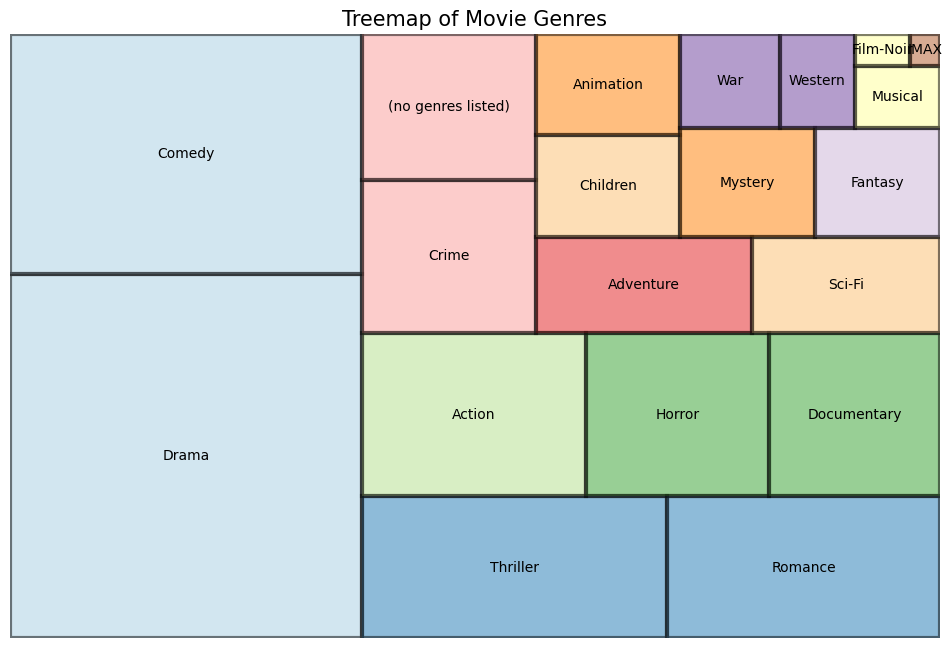

In [18]:
import squarify
#Create variable "temp_df"
temp_df = df_movies['genres'].explode().value_counts().reset_index()

#Plotting popular genres using Treemap
sizes=np.array(temp_df['genres'])
labels=temp_df['index']
colors = [plt.cm.Paired(i/float(len(labels))) for i in range(len(labels))]
plt.figure(figsize=(12,8), dpi= 100)
squarify.plot(sizes=sizes, label=labels, color = colors, alpha=.5, edgecolor="black", linewidth=3, text_kwargs={'fontsize':10})
plt.title('Treemap of Movie Genres', fontsize = 15)
plt.axis('off')
plt.show()

* The top 5 genres are, in that respect order: Drama, Comedy, Action, Thriller, and Romance.

In [19]:
#Merging the imdb_df and movies_df
movies_imdb_df = pd.merge(df_imdb,df_movies,on ='movieId',how ='inner')

In [20]:
#Create variable "budget_genre"
budget_genre=movies_imdb_df[['genres','budget']].explode('genres')
budget_genre['budget']=budget_genre['budget'].str.replace(',', "").str.extract('(\d+)', expand=False).astype('float')

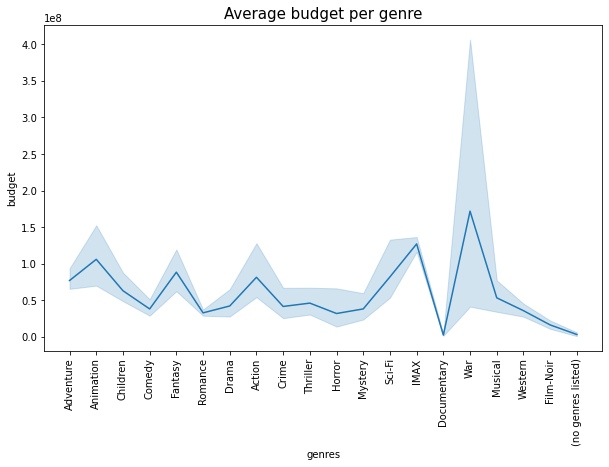

In [24]:
#Plotting an average budget per genre using line-plot
plt.figure(figsize=(10,6))
ax=sns.lineplot(x="genres", y="budget", palette = ["red"],  data=budget_genre)
ax.set_title('Average budget per genre',fontsize=15)
plt.xticks(rotation=90)
plt.show()

* Observation: Movies with the genre War had the biggest budget according to our database